In [1]:

import sys
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display
print("IPython version: {}". format(IPython.__version__)) 

import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))


import random
import time



import warnings
warnings.filterwarnings('ignore')
print('-'*25)





Python version: 3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:20:19) [MSC v.1925 32 bit (Intel)]
pandas version: 1.1.2
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.18.1
scikit-learn version: 0.23.2
-------------------------


In [2]:

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix


%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
train = pd.read_csv('../titanic/train.csv')
test = pd.read_csv('../titanic/test.csv')

# data1 = data_raw.copy(deep = True)
# data_cleaner = [data1,data_val]
# print(data_raw.info())

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


### A. Handle Missing Values

In [7]:
print('Train columns dengan null values:\n', train.isnull().sum())
print("-"*10)

print('Test columns dengan null values:\n', test.isnull().sum())
print("-"*10)

Train columns dengan null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns dengan null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [8]:
def prosentase_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

diatas merupakan simple function untuk mengetahui prosentase missing value dari sebuah dataframe

In [9]:
prosentase_missing(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [10]:
prosentase_missing(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Mari kita buat function percent_value_count
    

In [11]:
def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [12]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


di dalam kolom Embarked, hanya ada 2 null values (0.22%), kita akan coba replace dengan mode Values dari "S". Coba kita liat data mana yang null

In [13]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


dari data diatas, ada parameter lain yaitu Fare, mereka berdua membayar dengan $80 dan masuk Pclass 1 serta female sex. Mari kita liat bagaimana kolom **Fare** terdistribusi dengan **Pclass** dan **Embarked**

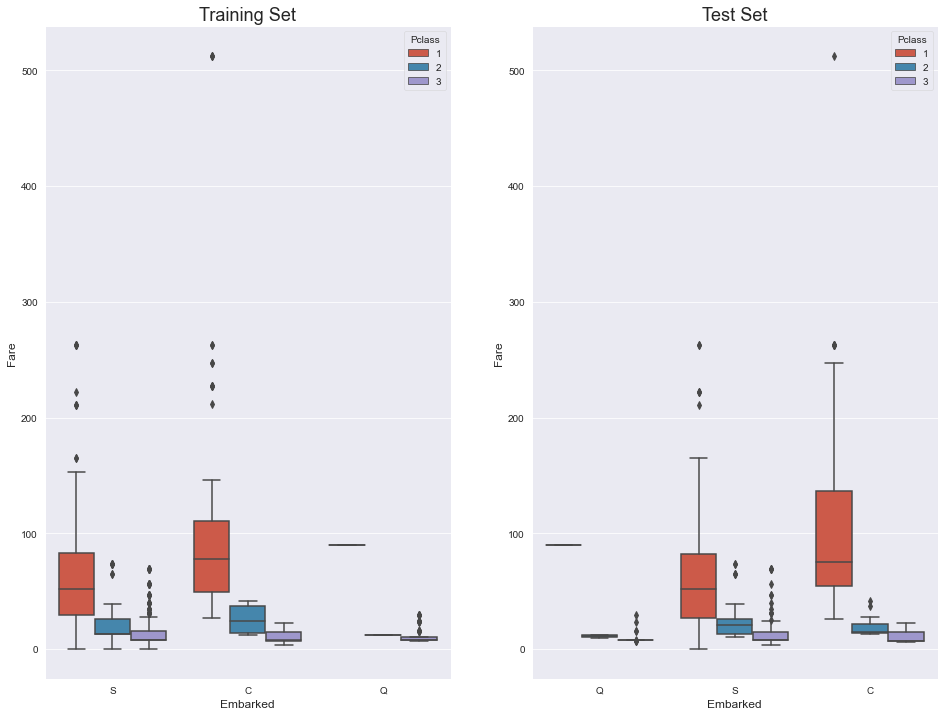

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


fig.show()

Dari kedua Trainind maupun test set, **fare** dengan nilai average mendekati $80 dan **Pclass 1** berada di Embarked **C**, oleh karena itu mari kita isi dengan value **C**

**Cabin Feature**

Data Cabin terdapat sekitar 77.1% missing value di Train dataset dan 78.22% missing value di test dataset. Pilihan pertama kita dapat drop columns cabin, tapi coba kita brainstorming:

    penumpang dengan Cabin yang ter-record memiliki status ekonomi yang lebih tinggi dibandingkan penumpang lain dan kemungkinan akan mendapat peluang lebih besar mendapatkan skoci 

Kita coba gabungakan train dan test dataset dan assign null value dengan **N**

In [15]:
## Concat train and test ke variable all_data
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)


all_data.Cabin.fillna("N", inplace=True)

Ada penumpang yang sharing room cabin atau pesan cabin dengan keluarganya. Kita coba menggukan Huruf depan cabin nya sebagai acuan

In [16]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [17]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


Mari kita liat kaitan dari Huruf pertama Cabin dengan **Fare** dengan menggunakan groupby

In [18]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

kita akan buat function prediksi Cabin berdasarkan fare nya

In [19]:
def prediksi_cabin(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [20]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

In [21]:
 
with_N['Cabin'] = with_N.Fare.apply(lambda x: prediksi_cabin(x))

 
all_data = pd.concat([with_N, without_N], axis=0)

#kita pisahkan Train dan test dataset dengan menggunakan PassengerId
all_data.sort_values(by = 'PassengerId', inplace=True)

 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

**Fare** Missing Value


In [22]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


Kita akan replace dengan nilai rata-rata seseorang dimana Pclass=3, Embarked =S dan Sex=male

In [23]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

In [24]:
missing_value

12.718872000000001

**Age Feature**

In [25]:
print ("Train age missing value: " + str((train.Age.isnull().sum()/len(train))*100)+str("%"))
print ("Test age missing value: " + str((test.Age.isnull().sum()/len(test))*100)+str("%"))

Train age missing value: 19.865319865319865%
Test age missing value: 20.574162679425836%


dari hasil diatas terlihat bahwa missing value berkisar di angka 19.8% hingga 20.5% . Feature Age ini akan cukup significant membantu menentukan survival rate. Oleh karena itu daripada kita replace dengan median,mean atau mode kita akan gunakan model machine learning Random Forest Regressor untuk mengisi null value. See you later ya Age feature :) kita visualisaikan data dulu

### B. Visualisasi dan Feature Relations

asumsi awal:
- Gender : Female lebih bisa survive
- Pclass : Ekonomi Social yang lebih tinggi, lebih prioritas
- Age : Penumpang lebih muda lebih bisa survive
- Fare : Penumpang dengan Fare lebih tinggi, lebih survived dibandingkan lainnnya



**Gender and Survived**


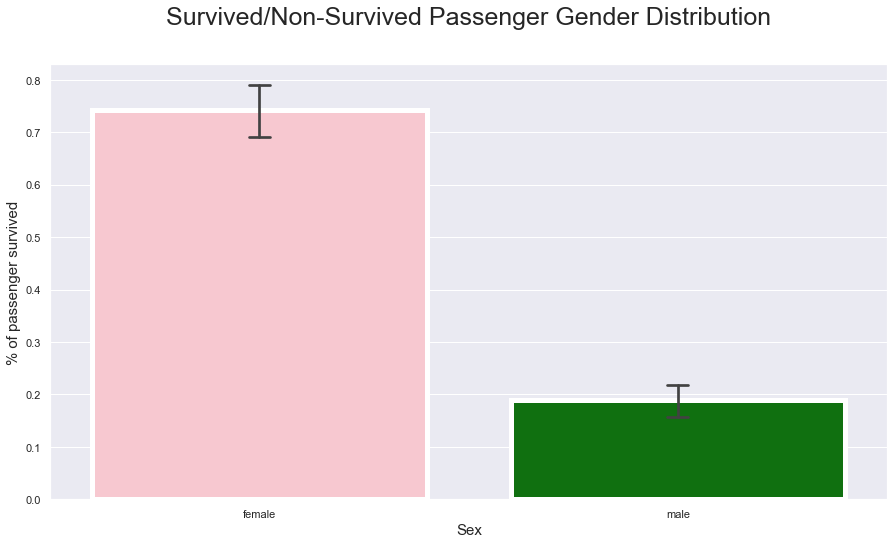

In [26]:
import seaborn as sns
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

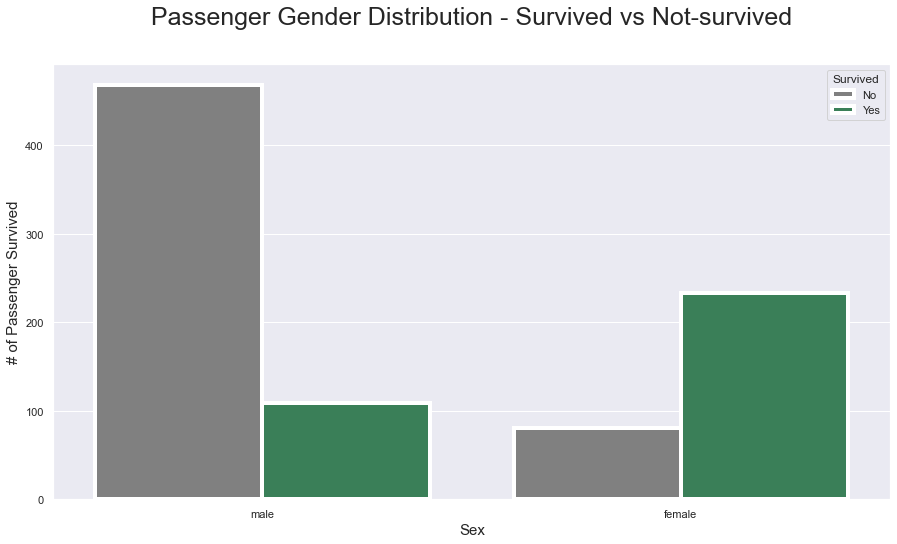

In [27]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)


## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

dari data ini terbukti bahwa female lebih survived dibandingkan male, dikarenakan memang anak-anak dan wanita lebih di prioritaskan naik sekoci

**Pclass dan Survived**

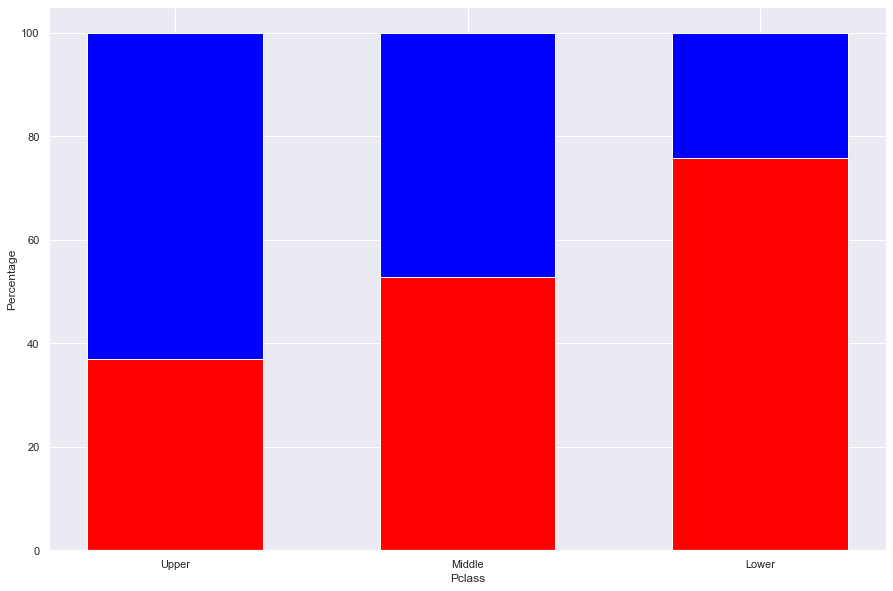

In [28]:
temp = train[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count().reset_index()
temp_df = pd.pivot_table(temp, values = 'PassengerId', index = 'Pclass',columns = 'Survived')
names = ['No', 'Yes']
temp_df.columns = names
r = [0,1,2]
totals = [i+j for i, j in zip(temp_df['No'], temp_df['Yes'])]
No_s = [i / j * 100 for i,j in zip(temp_df['No'], totals)]
Yes_s = [i / j * 100 for i,j in zip(temp_df['Yes'], totals)]
## Plotting
plt.subplots(figsize = (15,10))
barWidth = 0.60
names = ('Upper', 'Middle', 'Lower')
# Create green Bars
plt.bar(r, No_s, color='Red', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, Yes_s, bottom=No_s, color='blue', edgecolor='white', width=barWidth)

 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Pclass")
plt.ylabel('Percentage')

 
# Show graphic
plt.show()

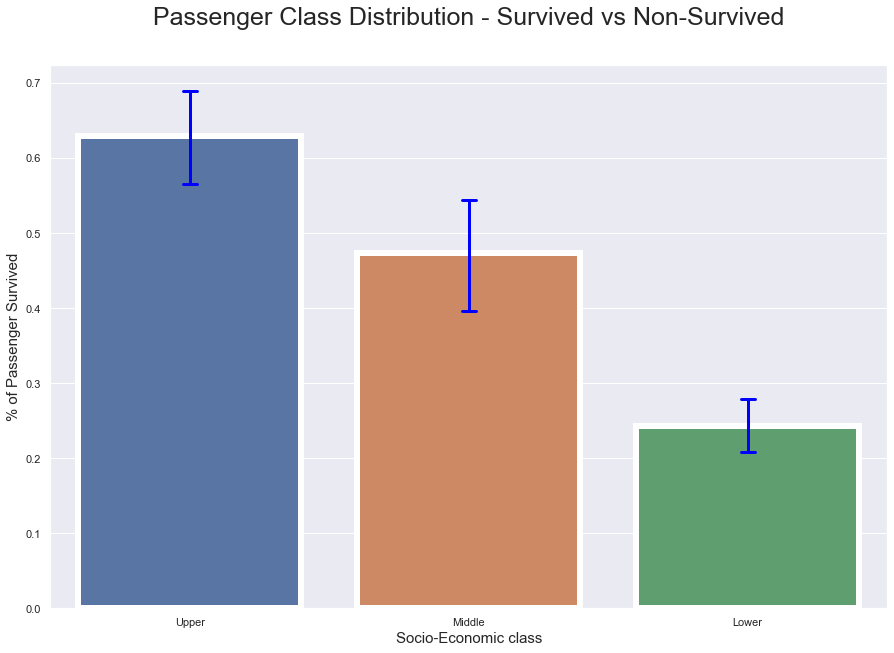

In [29]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=6,
            capsize = .05,
            errcolor='blue',
            errwidth = 3
            

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
names = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names);


- 63% first class passenger survived
- 48% second class 
- only 24% third class passenger survived

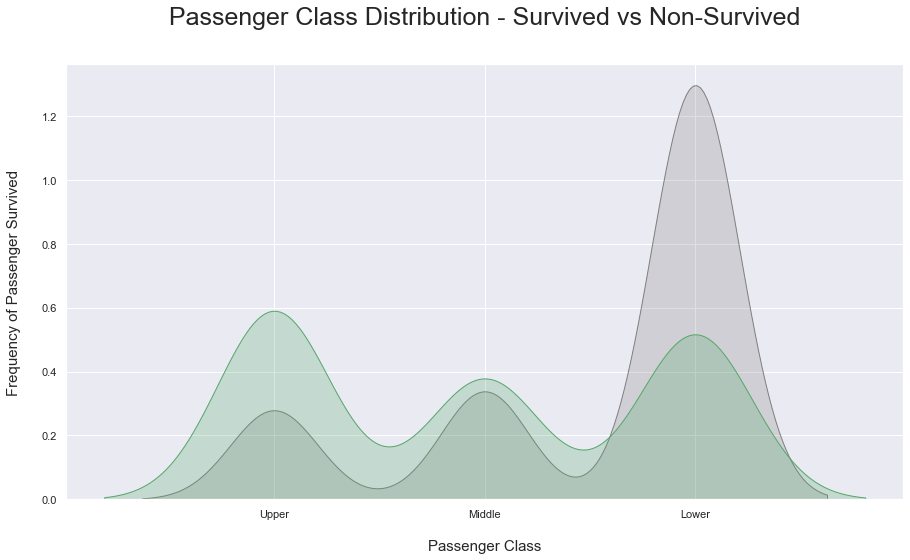

In [30]:

fig = plt.figure(figsize=(15,8),)

ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)


labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

First Pclass lebih survived dibandingakan class lainnya

**Fare dan Survived**

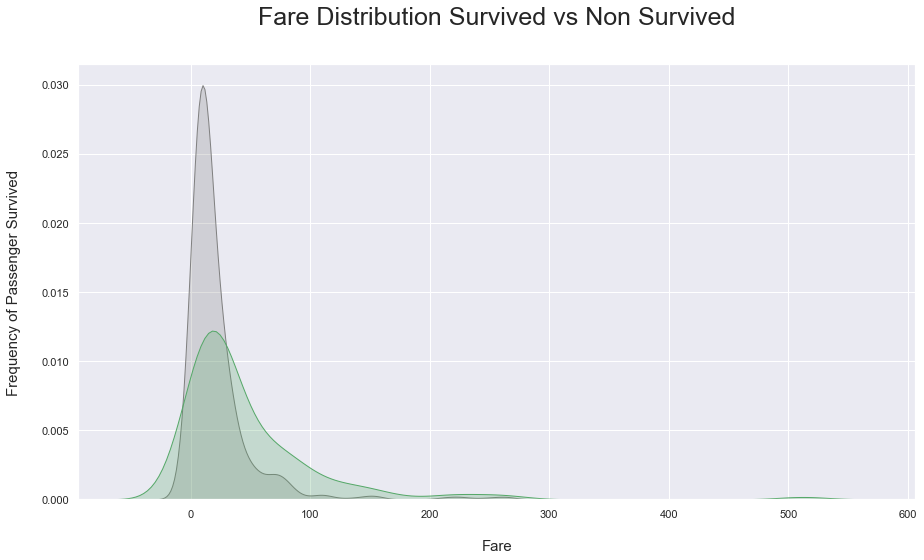

In [31]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,legend=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, legend=True,label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

Dari plot ini dapat dilihat:
- spike di bawah 100 dollar merepresentasikan bahwa penumpang di range under 100 mostly tidak survive
- nilai diatas 280 tidak ada garis abu-abu (not survive) bisa jadi ini data outlier atau memang diatas 280 survived semua, akan kita liat lagi

In [32]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


sepertinya ketiga data tersebut outlier

**Age dan Survived**

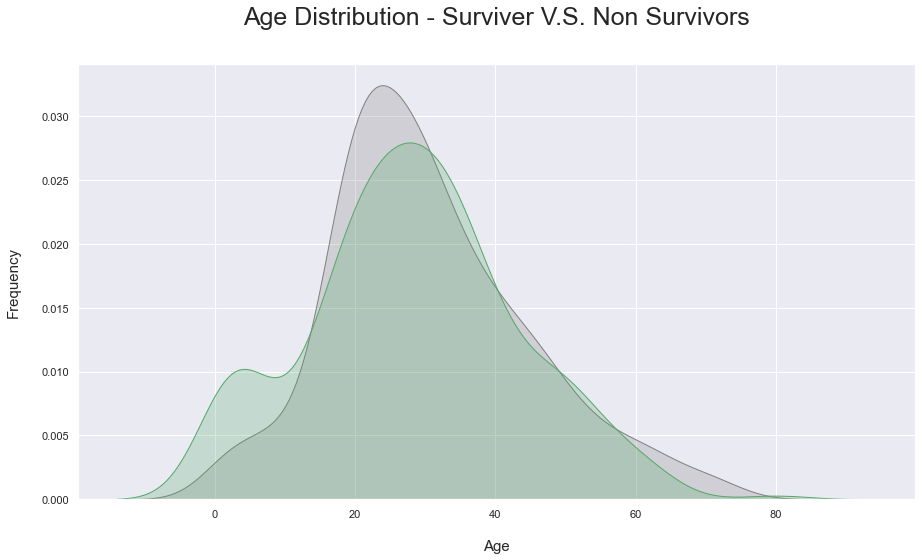

In [33]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25, pad = 40)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.ylabel('Frequency', fontsize = 15, labelpad= 20);

**Combie Feature Relations**

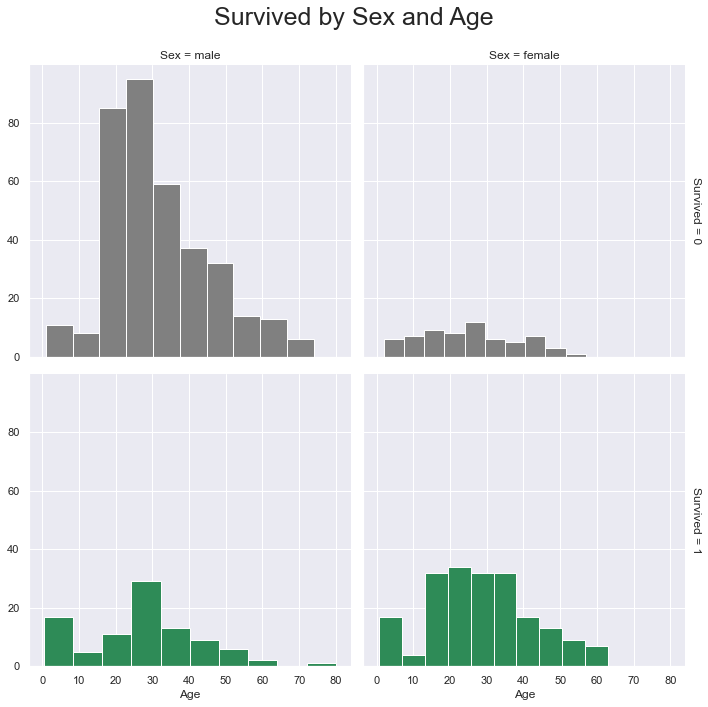

In [34]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

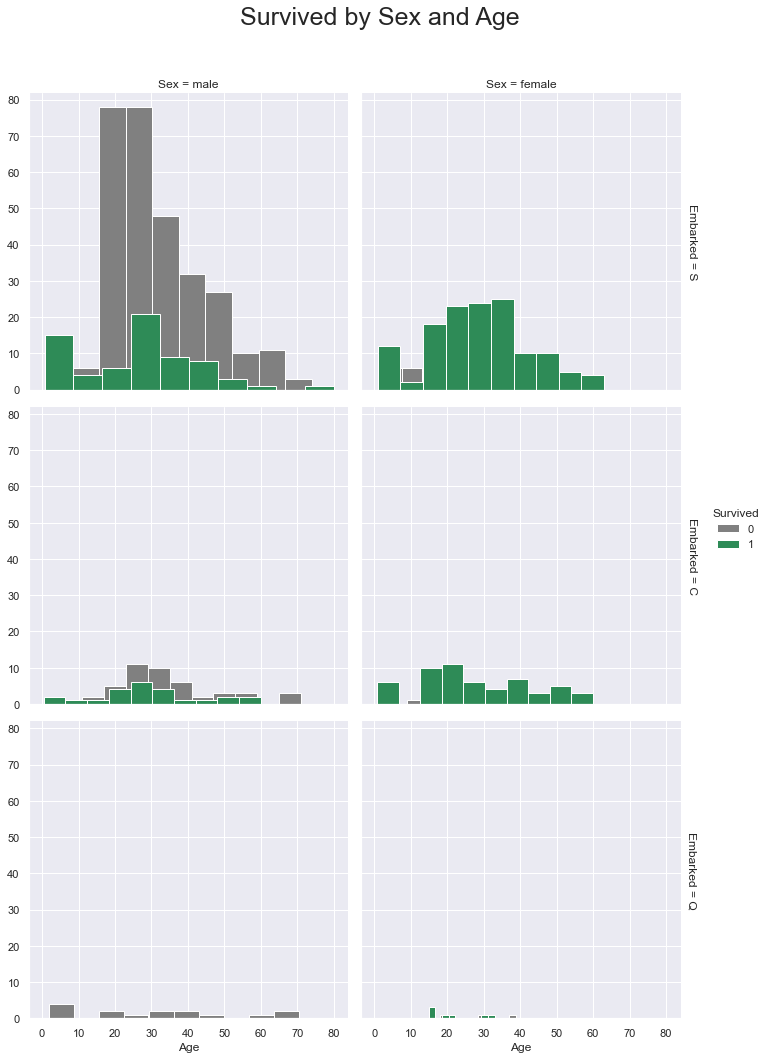

In [35]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Insight yang dapat diambil adalah:
- Mostly penumpang berangkat dari embarkasi Southampton(S)
- Lebih dari 60% penumpang tidak survive dari Southampton
- Lebih dari 60% penumpang survive dari Cherbourgh(C)
- Male dari Queenstown(Q) tidak survive
- beberapa females dari Queenstown(Q), sebagian besar dari mereka survive


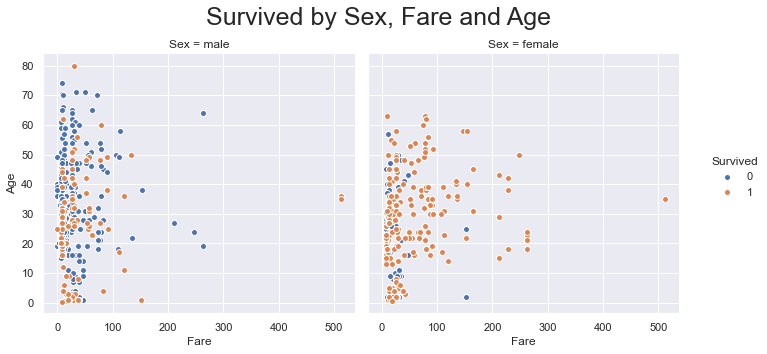

In [36]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                 )# palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

Insight:
- terdapat outlier data Fare diatas 500 dollar
- mostly penumpang range Fare nya 100 dollar

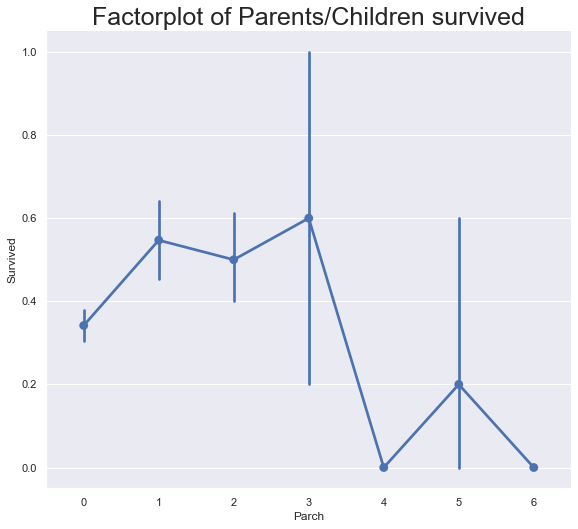

In [37]:
## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

Penumpang yang berlayar dengan membawa keluarga yang besar (Parent dan Child) lebih tidak bisa survived

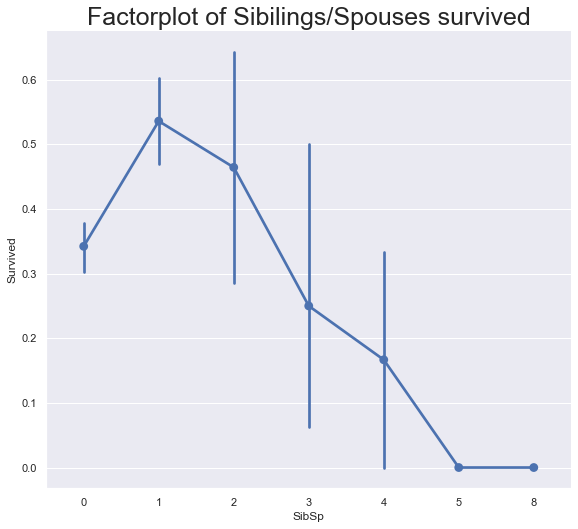

In [38]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

Penumpang yang berlayar bersama saudara Siblings atau Spouse dibawah 3 lebih bisa survive

### C. Statistical Overview

In [39]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [40]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [41]:
train.describe(include =['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,886
unique,888,680,8,3
top,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",CA. 2343,G,S
freq,1,7,464,644


In [42]:
# Overview(Survived vs non survied)
survived_summary = train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [43]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [44]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


Insight:
- 38% Passenger survived
- 74% female survive, 19% male survive
- 63% first class survive, 24% lower class survive

In [45]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


Sex adalah variable yang paling berkorelasi dengan survive, diikuti dengan PClass

In [46]:
## get the most important variables. 
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

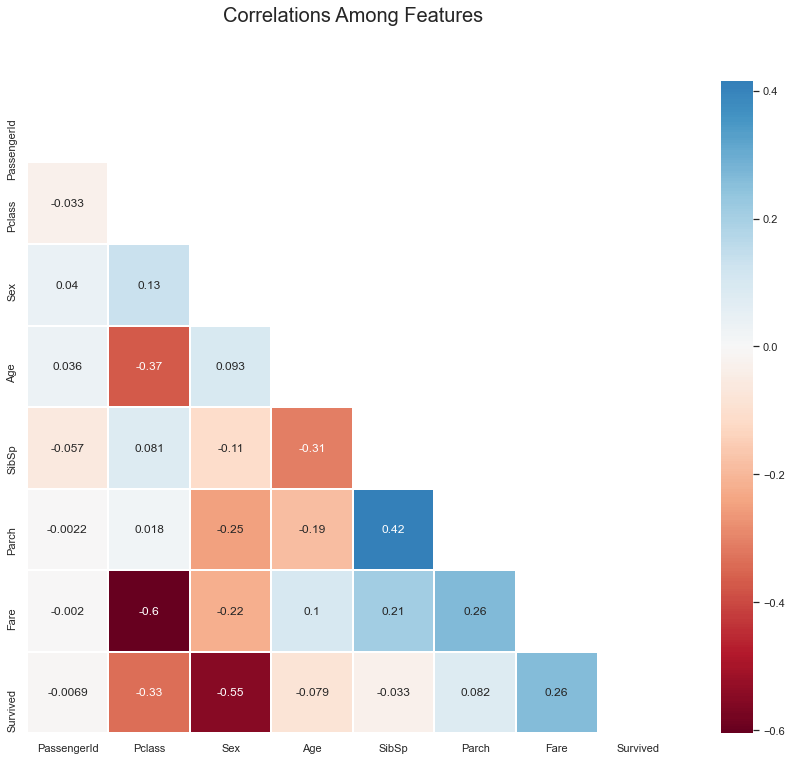

In [47]:
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

Positive Correlation Features:
- Fare and Survived: 0.26

Negative Correlation Features:
- Fare and Pclass: -0.6
- Sex and Survived: -0.55
- Pclass and Survived: -0.33

In [48]:
male_mean = train[train['Sex'] == 1].Survived.mean()

female_mean = train[train['Sex'] == 0].Survived.mean()
print ("Male survival mean: " + str(male_mean))
print ("female survival mean: " + str(female_mean))

print ("The mean difference between male and female survival rate: " + str(female_mean - male_mean))

Male survival mean: 0.18608695652173912
female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: 0.5551271009862481


In [49]:
# separating male and female dataframe. 
import random
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

## empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Male mean sample mean: 0.2
Male mean sample mean: 0.73
Difference between male and female mean sample mean: 0.53


### D. Feature Engineering

**Name Length**

In [50]:
# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

**Title**

In [51]:
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
## Whenever we split like that, there is a good change that 
#we will end up with white space around our string values. Let's check that. 

In [52]:
print(train.title.unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer']


In [53]:
## Let's fix that
train.title = train.title.apply(lambda x: x.strip())

In [54]:
## We can also combile all three lines above for test set here
test['title'] = [i.split('.')[0].split(',')[1].strip() for i in test.Name]
 

In [55]:
## Let's replace some of the rare values with the keyword 'rare' and other word choice of our own. 
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]

In [56]:
# we are writing a function that can help us modify title column
def fuse_title(feature):
    """
    This function helps modifying the title column
    """
    
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

test.title = test.title.map(fuse_title)
train.title = train.title.map(fuse_title)

In [57]:
print(train.title.unique())
print(test.title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare']
['Mr' 'Mrs' 'Miss' 'Master' 'rare']


**Family-Size**

In [58]:
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [59]:
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [60]:
## apply the family_group function in family_size
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

**Is Alone?**


In [61]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

**Ticket**

In [62]:
train.Ticket.value_counts().sample(10)

250652     1
236853     1
28665      1
343120     1
2629       1
349213     1
31028      1
349253     1
3101267    1
347060     1
Name: Ticket, dtype: int64

In [63]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

**Fare**


In [64]:
## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

In [65]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)


In [66]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

#### Dummy Variable

In [67]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [68]:
train.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,0,38.0,1,0,1,0,35.64165,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,0,35.0,1,0,1,0,26.55000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,1,0,0,1,0,0,0,1,0,0


In [69]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [70]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

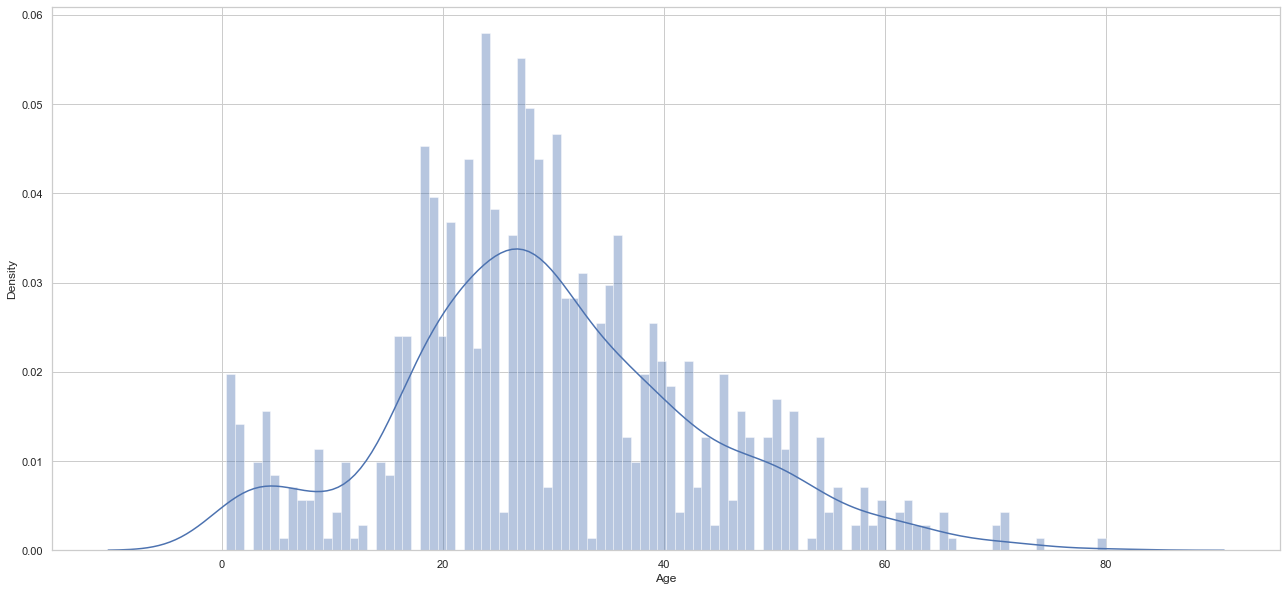

In [71]:
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

In [72]:
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

### Pre-Modeling 

**memisahkan dependent dan independet variable**

In [73]:
# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

**Splitting Training data**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [75]:
len(X_train)

594

In [76]:
len(X_test)

294

**Feature Scalling**

In [77]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
692,1,29.404653,1,0,0,1,56.4958,0,0,1,...,0,1,0,0,0,0,0,0,0,0
309,1,30.000000,0,0,0,1,56.9292,0,1,0,...,0,1,0,0,0,0,0,0,0,0
98,1,34.000000,0,0,1,0,11.5000,0,0,0,...,1,0,0,0,0,0,0,0,0,0
654,0,18.000000,0,0,0,1,6.7500,0,1,0,...,0,0,0,0,0,0,0,0,1,0
211,1,35.000000,0,0,0,1,21.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
## getting the headers
headers = X_train.columns 
X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
849,41.143333,0,1,0,0,44.5521,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [79]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

## transforming "train_x"
X_train = std_scale.fit_transform(X_train)
## transforming "test_x"
X_test = std_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

In [80]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_Master,title_Miss,title_Mr,title_Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.256774,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.444500,-0.246403,-0.116841,-0.309743,-0.101015,5.223573,-0.286299,-0.200699
1,1.115696,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,2.249717,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
2,0.840649,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,2.249717,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
3,-0.881189,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.444500,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699
4,-0.809872,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.444500,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699


### F. Modeling the Data

**>> Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

In [83]:
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,149,28
Survived,30,87


**Confusion Matrix**

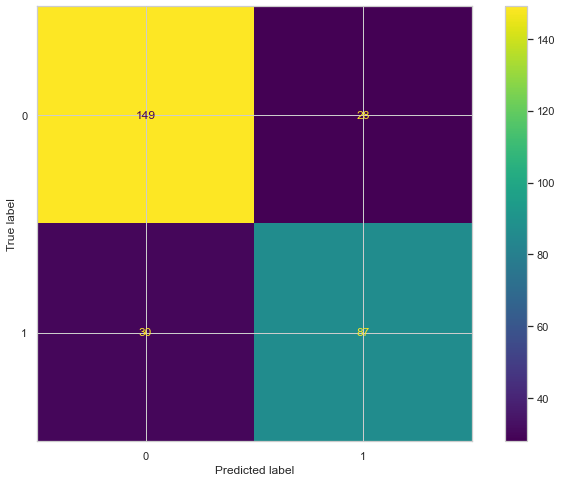

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [87]:
accuracy_score(y_test, y_pred)

0.8027210884353742

In [88]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7435897435897436

In [89]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       177
           1       0.76      0.74      0.75       117

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



Confusion matrix, without normalization
[[149  28]
 [ 30  87]]
Normalized confusion matrix
[[0.84 0.16]
 [0.26 0.74]]


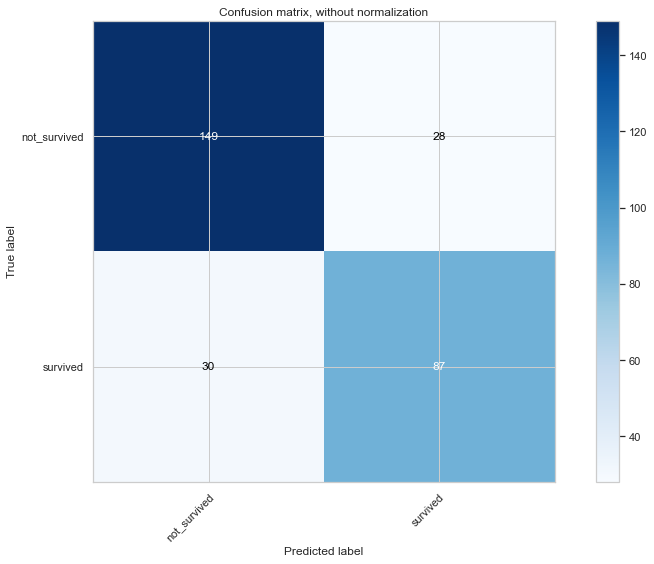

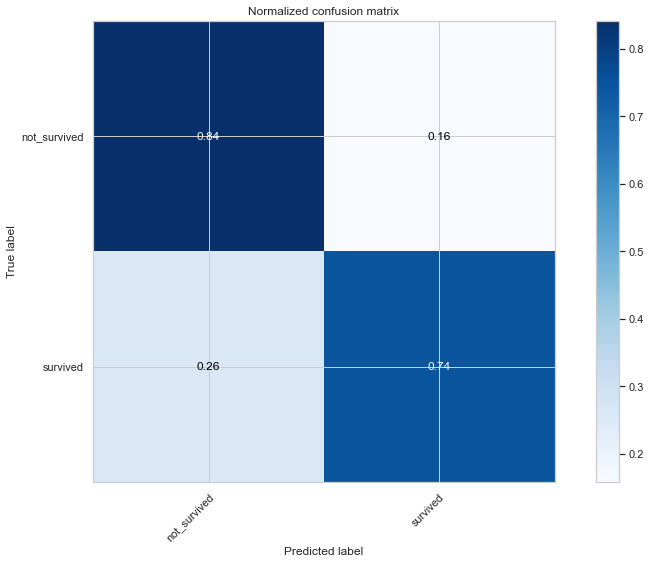

In [90]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['not_survived','survived'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**AUC & ROC Curve**

0.8355304456999372


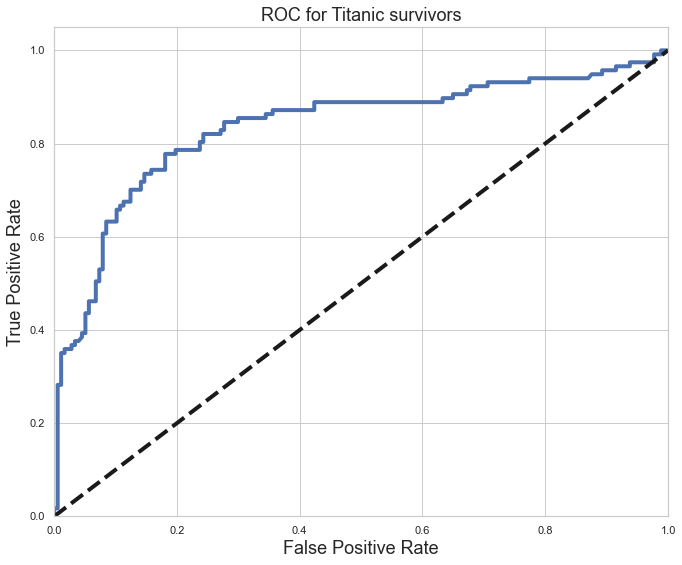

In [92]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

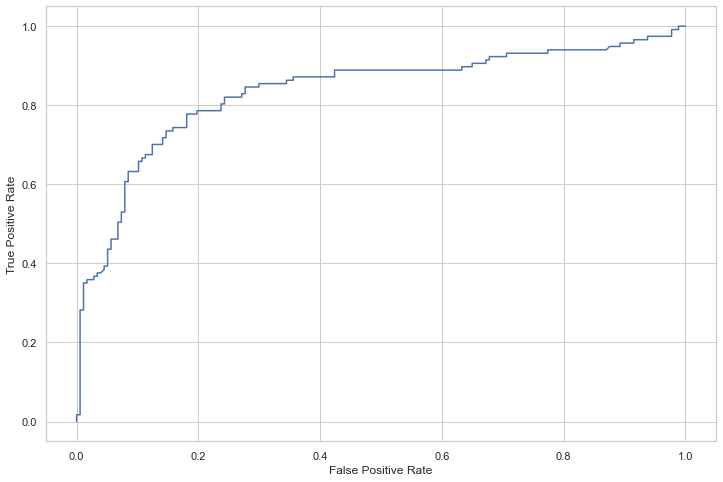

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = logreg.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=logreg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, ).plot()

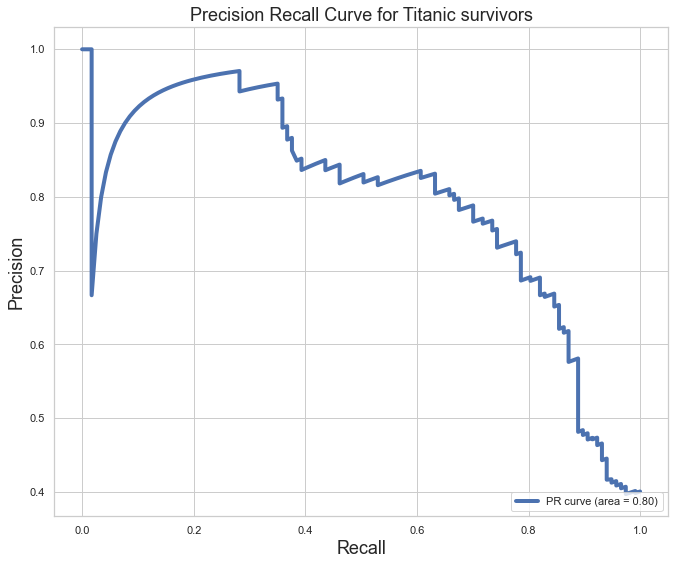

In [94]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**Menggunakan Cross Validation**

In [95]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = std_scale.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.82 0.85 0.82 0.85 0.83 0.83 0.8  0.85 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82793


**Grid Search on Logistic Regression**

In [96]:
from sklearn.model_selection import GridSearchCV
# C_vals is the alpla value of lasso and ridge regression(as 
# alpha increases the model complexity decreases,)

## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

## Choosing penalties(Lasso(l1) or Ridge(l2))
# penalties = ['l1','l2']

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'C': C_vals}

logreg = LogisticRegression()
## Calling on GridSearchCV object. 
grid = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid = param,
    scoring = 'accuracy',
    n_jobs =-1,
    cv = cv
)
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             scoring='accuracy')

In [97]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8378378378378379
{'C': 0.2}
LogisticRegression(C=0.2)


In [98]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.838963963963964

#### >> K-Nearest Neighbors Classifier (KNN)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.82 0.81 0.78 0.8  0.82 0.82 0.79 0.79 0.77 0.82]
Mean Cross-Validation accuracy score: 0.801


In [101]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.7500000000000001, 0.777027027027027, 0.7941441441441441, 0.7864864864864864, 0.8009009009009009, 0.8013513513513514, 0.7963963963963965, 0.7927927927927928, 0.8018018018018017, 0.7923423423423424, 0.7977477477477477, 0.7905405405405406, 0.7954954954954954, 0.7923423423423422, 0.8, 0.7842342342342342, 0.7891891891891891, 0.7797297297297298, 0.7900900900900901, 0.7806306306306307, 0.786036036036036, 0.7765765765765766, 0.7842342342342343, 0.7720720720720721, 0.7752252252252252, 0.7635135135135135, 0.7675675675675675, 0.759009009009009, 0.7635135135135136, 0.7563063063063064]

Mean accuracy score: 0.7832432432432431


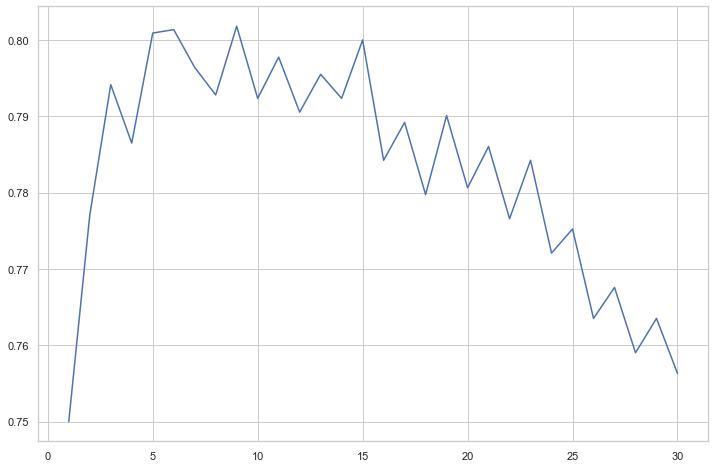

In [102]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

**Grid Search on KNN**

In [103]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [104]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8052434456928838
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier()


In [105]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.8671171171171171

**Using RandomizeSearchCV**


In [106]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [107]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8018726591760299
{'weights': 'uniform', 'n_neighbors': 5}
KNeighborsClassifier()


In [108]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

0.8671171171171171

**>> Gaussian Naive Bayes**

In [110]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.789


**>> SVM**

In [111]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

In [113]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.845318352059925
{'C': 2, 'gamma': 0.001}
SVC(C=2, gamma=0.001, probability=True)


In [115]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.8265765765765766

**>> Decission Tree Classifier**

In [117]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedShuffleSplit(n_splits=20, random_state=15),
                                n_jobs = -1)
grid.fit(X, y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=20, random_state=15, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'auto']},
             verbose=False)

In [118]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 24}
0.8415730337078651
DecisionTreeClassifier(max_depth=5, max_features=24)


In [119]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8536036036036037

In [120]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.546301
family_group_large,0.126688
calculated_fare,0.109904
Cabin_G,0.042710
fare_group_low,0.037551
Age,0.036402
title_rare,0.025336
Pclass_3,0.023842
Sex,0.017676
age_group_senior_citizen,0.012064


**>> Random Forest Classfifier**

In [121]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [122]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.842696629213483
{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 145}
RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=145)


In [123]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.8581081081081081

In [124]:
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       177
           1       0.74      0.72      0.73       117

    accuracy                           0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294



In [125]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_Mr,0.183051
Sex,0.147931
calculated_fare,0.084564
Age,0.062847
title_Miss,0.060828
Pclass_3,0.053822
title_Mrs,0.045835
Cabin_G,0.026748
SibSp,0.026632
family_group_small,0.025674


**Bagging Classifier**

In [127]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [128]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8191011235955056
{'n_estimators': 160}
BaggingClassifier(n_estimators=160)


In [129]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9887387387387387

**ADA Boost Classifier**

In [130]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]})

In [131]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8247191011235955
{'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


In [132]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X,y)

0.8355855855855856

**>> Gradient Boosting Classifier**

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.874


**>> Extra Trees Classifier**

In [137]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.963


**Gausian Process Classifier**

In [139]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.925


**Voting CLassifier**

In [141]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
    ('bagging_classifier', bagging_grid),
    ('adaBoost_classifier',adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaussian_classifier',gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
],voting='hard')

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(X,y)

In [142]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.857


In [143]:
all_models = [logreg_grid,
              knn_grid, 
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b


In [144]:
c

{LogisticRegression(C=0.2): 0.8129251700680272,
 KNeighborsClassifier(): 0.8571428571428571,
 KNeighborsClassifier(): 0.8571428571428571,
 SVC(C=2, gamma=0.001, probability=True): 0.8027210884353742,
 DecisionTreeClassifier(max_depth=5, max_features=24): 0.8027210884353742,
 RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=145): 0.8333333333333334,
 BaggingClassifier(n_estimators=160): 0.9217687074829932,
 AdaBoostClassifier(learning_rate=0.1, n_estimators=100): 0.8129251700680272,
 VotingClassifier(estimators=[('lr_grid', LogisticRegression(C=0.2)),
                              ('svc', SVC(C=2, gamma=0.001, probability=True)),
                              ('random_forest',
                               RandomForestClassifier(criterion='entropy',
                                                      max_depth=6,
                                                      n_estimators=145)),
                              ('gradient_boosting',
                          